# Using PCA to identify pairs for PAIR Trading

## Import and Install libraries

In [105]:
#!pip install ccxt
#!pip install tqdm
#!pip install beautifulsoup4
#!pip install lxml

In [119]:
from scipy import stats
from matplotlib.ticker import MaxNLocator
import ccxt 
from datetime import datetime, timedelta
import pandas as pd
import time
from data_download import download_first_exchange
from data_download import pair_exist
import numpy as np
from matplotlib import pyplot as plt
from datetime import time
from pandas import Timestamp
from mpl_toolkits.mplot3d import Axes3D
import re
from tqdm import tqdm
import seaborn as sns
from bs4 import BeautifulSoup
import requests as req
import re

First step is to choose pairs we want to analyse. In this work i am taking Top 20 pairs from Binance exchange by 24h Volume with USDT as base currency.
To do that we are parsing Coinmarketcap and extracting these pairs.

In [114]:
exchange_page = req.get('https://coinmarketcap.com/exchanges/binance/')
exchange_data = BeautifulSoup(exchange_page.text, "html.parser")
pairs = exchange_data.find_all('a',text=re.compile(r'/USDT'))
tickers = []
for pair in pairs[:20]:
    tickers.append(pair.string.replace('/USDT',''))
tickers

Next step is to download prices of these pairs directly from Binance Exchange and unite them in one table. I do it by using library ccxt and my script(data_download).

In [154]:
len(list_)

20

In [156]:
#list_ = []
#for ticker in tqdm(tickers):
 #   df1 =  download_first_exchange(str('binance'), '{}/USDT'.format(ticker), '1h', '2017-09-01 00:00:00')
  #  df1.index = pd.to_datetime(df1.index,format='%Y-%m-%d %H:%M:%S')
   # df1 = df1[~df1.index.duplicated(keep='first')]
    #df1.columns = ['o','h','l','c','v']
    #list_.append(df1)
len(list_)

20

In [155]:
closes = pd.concat([list_[0]['c'],list_[1]['c'],list_[2]['c'],list_[3]['c'],list_[4]['c'],list_[5]['c'],
list_[6]['c'],list_[7]['c'],list_[8]['c'],list_[9]['c'],list_[10]['c'],list_[11]['c'],list_[12]['c'],
list_[13]['c'],list_[14]['c'],list_[15]['c'],list_[16]['c'],list_[17]['c'],list_[18]['c'],list_[19]['c']],axis=1)
closes.columns = tickers
closes.dropna(inplace=True)
closes.head()

,BTC,ETH,BTC,ETH,XTZ,BCH,LINK,LTC,BNB,EOS,XTZ,LTC,ATOM,BUSD,LINK,BNB,BCH,ADA,XRP,EOS
Date,,,,,,,,,,,,,,,,,,,,
2019-11-28 10:00:00,7478.58,151.13,7478.58,151.13,1.2437,218.98,2.2359,47.23,15.8646,2.6608,1.2437,47.23,3.649,0.9998,2.2359,15.8646,218.98,0.03861,0.22530,2.6608
2019-11-28 11:00:00,7479.54,151.57,7479.54,151.57,1.2737,219.04,2.2518,47.36,15.8729,2.6716,1.2737,47.36,3.647,0.9996,2.2518,15.8729,219.04,0.03885,0.22601,2.6716
2019-11-28 12:00:00,7444.12,150.79,7444.12,150.79,1.2605,217.53,2.2173,46.84,15.6365,2.6448,1.2605,46.84,3.574,0.9997,2.2173,15.6365,217.53,0.03850,0.22497,2.6448
2019-11-28 13:00:00,7455.67,151.02,7455.67,151.02,1.2597,218.29,2.2101,46.91,15.6387,2.6490,1.2597,46.91,3.644,0.9996,2.2101,15.6387,218.29,0.03846,0.22482,2.6490
2019-11-28 14:00:00,7459.51,150.89,7459.51,150.89,1.2660,218.67,2.2335,47.03,15.7036,2.6518,1.2660,47.03,3.631,0.9998,2.2335,15.7036,218.67,0.03875,0.22514,2.6518


Calculating mean and standart deviation for each currency.

In [157]:
m = closes.mean(axis=0)
s = closes.std(ddof=1, axis=0)

Normalizing prices and calculate covariation and correlation matrices for calculating PCA

In [158]:
dfPort = (closes - m)/s
c = np.cov(dfPort.values.T)     # covariance matrix
co = np.corrcoef(closes.values.T)

In [186]:
closes

,BTC,ETH,BTC,ETH,XTZ,BCH,LINK,LTC,BNB,EOS,XTZ,LTC,ATOM,BUSD,LINK,BNB,BCH,ADA,XRP,EOS
Date,,,,,,,,,,,,,,,,,,,,
2019-11-28 10:00:00,7478.58,151.13,7478.58,151.13,1.2437,218.98,2.2359,47.23,15.8646,2.6608,1.2437,47.23,3.649,0.9998,2.2359,15.8646,218.98,0.03861,0.22530,2.6608
2019-11-28 11:00:00,7479.54,151.57,7479.54,151.57,1.2737,219.04,2.2518,47.36,15.8729,2.6716,1.2737,47.36,3.647,0.9996,2.2518,15.8729,219.04,0.03885,0.22601,2.6716
2019-11-28 12:00:00,7444.12,150.79,7444.12,150.79,1.2605,217.53,2.2173,46.84,15.6365,2.6448,1.2605,46.84,3.574,0.9997,2.2173,15.6365,217.53,0.03850,0.22497,2.6448
2019-11-28 13:00:00,7455.67,151.02,7455.67,151.02,1.2597,218.29,2.2101,46.91,15.6387,2.6490,1.2597,46.91,3.644,0.9996,2.2101,15.6387,218.29,0.03846,0.22482,2.6490
2019-11-28 14:00:00,7459.51,150.89,7459.51,150.89,1.2660,218.67,2.2335,47.03,15.7036,2.6518,1.2660,47.03,3.631,0.9998,2.2335,15.7036,218.67,0.03875,0.22514,2.6518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-25 09:00:00,7560.56,194.55,7560.56,194.55,2.7304,241.00,3.8176,44.96,16.1841,2.7254,2.7304,44.96,2.854,0.9995,3.8176,16.1841,241.00,0.04302,0.19538,2.7254
2020-04-25 10:00:00,7563.37,194.63,7563.37,194.63,2.7412,241.26,3.8236,45.29,16.2254,2.7303,2.7412,45.29,2.871,0.9994,3.8236,16.2254,241.26,0.04308,0.19549,2.7303
2020-04-25 11:00:00,7532.97,193.53,7532.97,193.53,2.7186,239.49,3.8014,44.61,16.1659,2.7141,2.7186,44.61,2.839,0.9992,3.8014,16.1659,239.49,0.04272,0.19453,2.7141


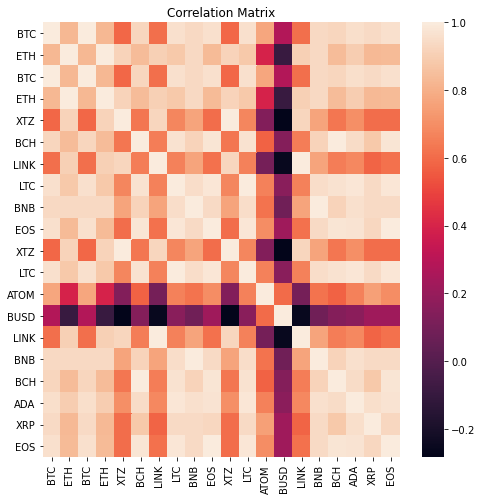

In [187]:
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix')
sns.heatmap(closes.corr())

**PCA analysis for High Correlated pairs**

Text(0, 0.5, 'PC-19')

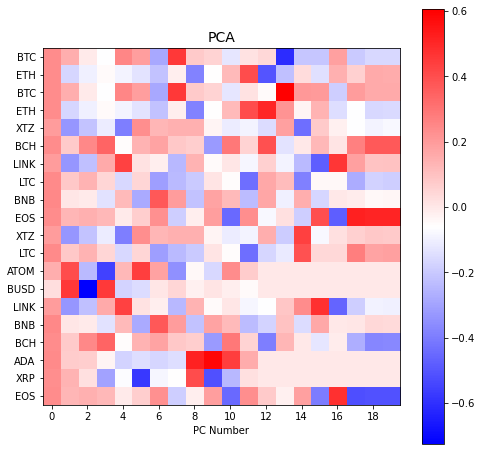

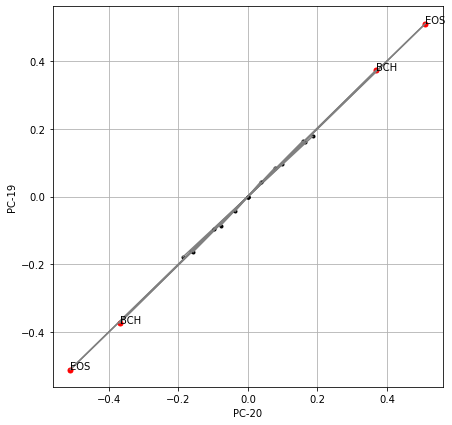

In [160]:
# perform PCA
w, v = np.linalg.eig(c)  
 
ax = plt.figure(figsize=(8,8)).gca()
plt.imshow(v, cmap="bwr", interpolation="nearest")
cb = plt.colorbar()
plt.yticks(np.arange(len(tickers)), tickers)
plt.xlabel("PC Number")
plt.title("PCA", fontsize=14)
# force x-tickers to be displayed as integers (not floats)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


# choose PC-k numbers
k1 = -1  # the last PC column in 'v' PCA matrix
k2 = -2  # the second last PC column
 
# begin constructing bi-plot for PC(k1) and PC(k2)
# loadings
plt.figure(figsize=(7,7))
plt.grid()
 
# compute the distance from (0,0) point
dist = []
for i in range(v.shape[0]):
    x = v[i,k1]
    y = v[i,k2]
    plt.plot(x, y, '.k')
    plt.plot([0,x], [0,y], '-', color='grey')
    d = np.sqrt(x**2 + y**2)
    dist.append(d)
    
quar = []
for i in range(v.shape[0]):
    x = v[i,k1]
    y = v[i,k2]
    d = np.sqrt(x**2 + y**2)
    if(d > np.mean(dist) + np.std(dist, ddof=1)):
        plt.plot(x, y, '.r', markersize=10)
        plt.plot([0,x], [0,y], '-', color='grey')
        if((x > 0) and (y > 0)):
            quar.append((i, 1))
        elif((x < 0) and (y > 0)):
            quar.append((i, 2))
        elif((x < 0) and (y < 0)):
            quar.append((i, 3))
        elif((x > 0) and (y < 0)):
            quar.append((i, 4))
        plt.text(x, y, tickers[i], color='k')
 
plt.xlabel("PC-" + str(len(tickers)+k1+1))
plt.ylabel("PC-" + str(len(tickers)+k2+1))




BCH BCH
R^2:  0.9999999981755077 , p-value:  0.0
k-tau:  0.9999987448501596 , k-value:  0.0
Slope:  0.9999995889680398


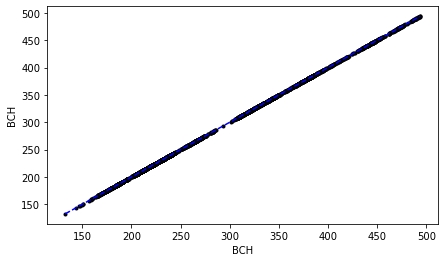

BCH EOS
R^2:  0.977472226067437 , p-value:  0.0
k-tau:  0.7558789673029045 , k-value:  0.0
Slope:  0.009904354212793514


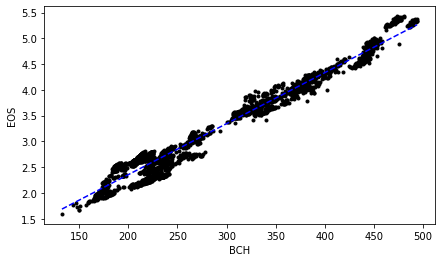

EOS BCH
R^2:  0.9774721874714004 , p-value:  0.0
k-tau:  0.7558794972767758 , k-value:  0.0
Slope:  96.46783496556814


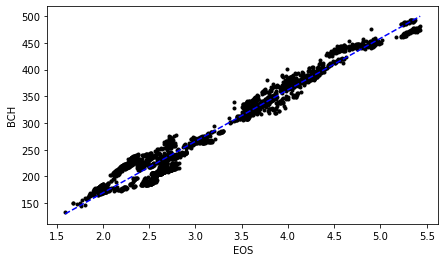

EOS EOS
R^2:  0.9999999999289187 , p-value:  0.0
k-tau:  0.9999992939870238 , k-value:  0.0
Slope:  1.000000087439038


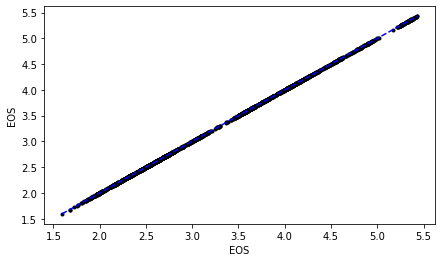

In [209]:
for i in range(len(quar)):
    # Q1 vs Q3
    if(quar[i][1] == 1):
        for j in range(len(quar)):
            if(quar[j][1] == 3):
                plt.figure(figsize=(7,4))
                
                # highly correlated coins according to the PC analysis
                print(tickers[quar[i][0]], tickers[quar[j][0]])
                
                ts1 = closes.iloc[:,quar[i][0]]  # time-series
                ts2 = closes.iloc[:,quar[j][0]]
                
                # correlation metrics and their p_values
                slope, intercept, r2, pvalue, _ = stats.linregress(ts1, ts2)
                ktau, kpvalue = stats.kendalltau(ts1, ts2)
                print('R^2: ',r2, ', p-value: ',pvalue)
                print('k-tau: ', ktau, ', k-value: ',kpvalue)
                print('Slope: ', slope)
                
                plt.plot(ts1, ts2, '.k')
                xline = np.linspace(np.min(ts1), np.max(ts1), 100)
                yline = slope*xline + intercept
                plt.plot(xline, yline,'--', color='b')  # linear model fit
                plt.xlabel(tickers[quar[i][0]])
                plt.ylabel(tickers[quar[j][0]])
                plt.show()
    # Q2 vs Q4
    if(quar[i][1] == 2):
        for j in range(len(quar)):
            if(quar[j][1] == 4):
                plt.figure(figsize=(7,4))
                print(tickers[quar[i][0]], tickers[quar[j][0]])
                ts1 = closes.iloc[:,quar[i][0]]
                ts2 = closes.iloc[:,quar[j][0]]
                slope, intercept, r2, pvalue, _ = stats.linregress(ts1, ts2)
                ktau, kpvalue = stats.kendalltau(ts1, ts2)
                print(r2, pvalue)
                print(ktau, kpvalue)
                plt.plot(ts1, ts2, '.k')
                xline = np.linspace(np.min(ts1), np.max(ts1), 100)
                yline = slope*xline + intercept
                plt.plot(xline, yline,'--', color='b')
                plt.xlabel(tickers[quar[i][0]])
                plt.ylabel(tickers[quar[j][0]])
                plt.show()

At the end we get EOS/USDT and BCH/USDT as most high correlated pair. Next step, we backtest simple pair-trading strategy, based on this finding. 

In [198]:
df1 =  download_first_exchange(str('binance'), 'EOS/USDT', '1h', '2017-09-01 00:00:00')
df1.index = pd.to_datetime(df1.index,format='%Y-%m-%d %H:%M:%S')
df1 = df1[~df1.index.duplicated(keep='first')]
df1.columns = map(str.lower, df1.columns)

df2 =  download_first_exchange(str('binance'), 'BCH/USDT', '1h', '2017-09-01 00:00:00')
df2.index = pd.to_datetime(df2.index,format='%Y-%m-%d %H:%M:%S')
df2 = df2[~df2.index.duplicated(keep='first')]
df2.columns = map(str.lower, df2.columns)


In [199]:
df1.head()

,open,high,low,close,volume
Date,,,,,
2018-05-28 05:00:00,12.4900,12.6500,11.3000,11.8175,155893.82
2018-05-28 06:00:00,11.8916,12.1012,11.7100,11.9997,88087.08
2018-05-28 07:00:00,12.0100,12.3200,11.8783,11.9368,106634.92
2018-05-28 08:00:00,11.9393,12.0500,11.7110,11.8614,147571.11
2018-05-28 09:00:00,11.8796,11.9996,11.7842,11.8261,145249.59


In [200]:
df2.head()

,open,high,low,close,volume
Date,,,,,
2019-11-28 10:00:00,220.08,224.60,212.02,218.98,1329.50718
2019-11-28 11:00:00,218.98,219.40,218.12,219.04,511.87305
2019-11-28 12:00:00,219.04,219.05,216.57,217.53,781.62961
2019-11-28 13:00:00,217.55,218.78,217.54,218.29,461.33172
2019-11-28 14:00:00,218.00,219.00,217.45,218.67,600.06810


In [201]:
print(df1.close.shape[0], df2.close.shape[0])  # both sizes must be equal

16697 3572


In [202]:
def start_date(cur1,cur2):
    if cur1.index[0] <= cur2.index[0]:
        start = cur2.index[0]
    else:
        start = cur1.index[0]
    if cur1.index[-1] <= cur2.index[-1]:
        end = cur1.index[-1]
    else:
        end =cur1.index[-1]
    return start, end

In [203]:
start,end = start_date(df1,df2)

In [204]:
print('Starting TimeDate: ', start,'Ending TimeDate: ', end)

Starting TimeDate:  2019-11-28 10:00:00 Ending TimeDate:  2020-04-25 14:00:00


Text(0.5, 0, 'Date')

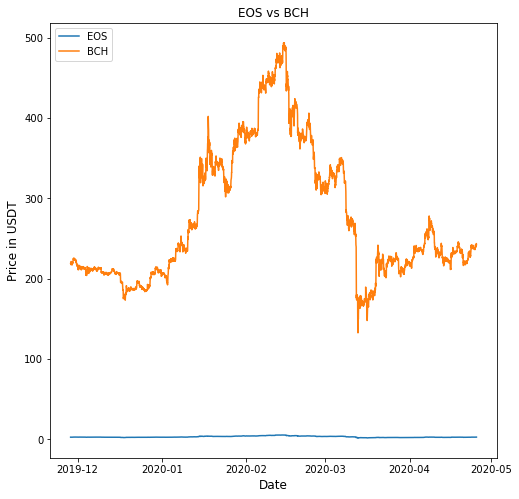

In [321]:
df1 = df1[(df1.index >= "{}".format(start)) & (df1.index <= "{}".format(end))]
df2 = df2[(df2.index >= "{}".format(start)) & (df2.index <= "{}".format(end))]
 
 
# plotting
plt.figure(figsize=(8,8))
plt.plot(df1.close, label='EOS')
plt.plot(df2.close, label='BCH')
plt.legend(loc=2)
plt.title('EOS vs BCH', fontsize=12)
plt.ylabel('Price in USDT', fontsize=12)
plt.xlabel('Date', fontsize=12)



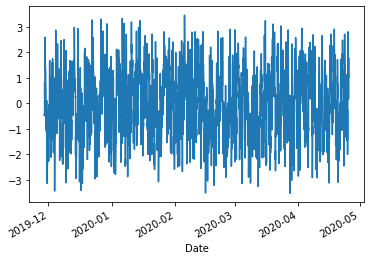

In [336]:
data = pd.concat([df1.close, df2.close],axis=1)
data.columns = ['EOS','BCH']
data['spread'] = np.log(data.BCH) - 0.009904354212793514*np.log(data.EOS)
data['z_score'] = (data['spread'] -data['spread'].rolling(15).mean())/data['spread'].rolling(15).std()
data.z_score.plot()

In [343]:
data['signal'] = np.where(data.z_score>2,1,0)
data['signal'] = np.where(data.z_score<-2,-1,data['signal'])
data['signal'] = np.where(data.z_score==0,0,data['signal'])


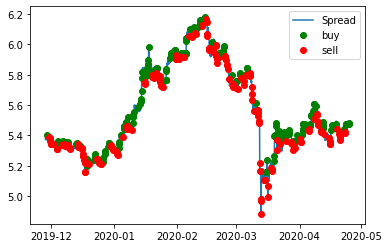

In [344]:
plt.plot(data.spread, label='Spread')
plt.plot(data.spread.loc[data.signal == 1], 's', color = 'green', marker = 'o' ,label='buy')
plt.plot(data.spread.loc[data.signal == -1], 's', color = 'red', marker = 'o' ,label='sell')
plt.legend()

In [327]:
data.dropna(inplace=True)

In [342]:
data.head()

,EOS,BCH,spread,z_score
Date,,,,
2019-11-28 10:00:00,2.6608,218.98,5.379288,NaN
2019-11-28 11:00:00,2.6716,219.04,5.379522,NaN
2019-11-28 12:00:00,2.6448,217.53,5.372704,NaN
2019-11-28 13:00:00,2.6490,218.29,5.376176,NaN
2019-11-28 14:00:00,2.6518,218.67,5.377905,NaN


In [334]:
data.z_score

Date
2019-11-29 00:00:00   -0.437382
2019-11-29 01:00:00   -0.492260
2019-11-29 02:00:00   -0.486245
2019-11-29 03:00:00    0.822438
2019-11-29 04:00:00    0.420667
                         ...   
2020-04-25 10:00:00    1.091320
2020-04-25 11:00:00    0.156890
2020-04-25 12:00:00    0.469116
2020-04-25 13:00:00    1.780183
2020-04-25 14:00:00    1.041744
Name: z_score, Length: 3558, dtype: float64

In [478]:
def trade(data, upper,lower,cl_lvl1,cl_lvl2):
    data['signal'] = np.where(data.z_score>upper,1,0)
    data['signal'] = np.where(data.z_score<lower,-1,data['signal'])
    #data['signal'] = np.where(data.z_score==0,0,data['signal'])
    investment = 10000  # USD
    account = investment
    roi = []
    money = []
    opened_orders =[]
    closed_orders =[]
    open_trades=False
    trade = False
    #n = len(data)  # number of data points
    for i in range(len(data)):
        p1=data.BCH.iloc[i]
        p2=data.EOS.iloc[i]
        if(open_trades==False):
            if(data.signal.iloc[i] ==1):
                asset1="LONG"
                asset2="SHORT"
                pos1=p1
                pos2=-96*p2
                trade=True
                #print("New BUY Trade Open")
                opened_orders.append([data.index[i],p1,p2,asset1,asset2,pos1,pos2])
                open_trades=True
            elif(data.signal.iloc[i] ==-1):
                asset1="SHORT"
                asset2="LONG"
                pos1=-p1
                pos2=96*p2
                trade=True
                #print("New SELL Trade Open")
                opened_orders.append([data.index[i],p1,p2,asset1,asset2,pos1,pos2])
                open_trades=True
        else:
            if(asset1=="LONG" and data.z_score[i]<=cl_lvl1):
                pos1=p1
                pos2=-96*p2
                pnl=(pos1/opened_orders[-1][5])-1+1-(pos2/opened_orders[-1][6])
                closed_orders.append([data.index[i],p1,p2,opened_orders[-1][5],opened_orders[-1][6],asset1,asset2,pos1,pos2,pnl])
                del opened_orders[-1]
                #print("Closing Order BUY")
                open_trades=False
            elif(asset1=="SHORT" and data.z_score[i]>=cl_lvl2):
                pos1=-p1
                pos2=96*p2
                pnl=1-(pos1/opened_orders[-1][5])+(pos2/opened_orders[-1][6])-1
                closed_orders.append([data.index[i],p1,p2,opened_orders[-1][5],opened_orders[-1][6],asset1,asset2,pos1,pos2,pnl])
                del opened_orders[-1]
                #print("Closing Order SELL")
                open_trades=False
    returns = pd.DataFrame(closed_orders,columns=['date','price1','price2','pos1old','pos2old','type of order1','type of order2','pos1','pos2','pnl'])
    #returns.tail()
    return(returns.pnl.cumsum().iloc[-1])
    #plt.plot(returns.pnl.cumsum())
    #plt.title('{}, {}, {}'.format(returns.pnl.cumsum().iloc[-1],cl_lvl1,cl_lvl2))

In [479]:
trade(data,1.5,-1.5,0.1,-0.1)

-0.3263621241702205

In [480]:
optimization_levels = [np.arange(0,2,0.1),np.arange(-2,0,0.1)]
optimization_upper_lower = [np.arange(1,3,0.1),np.arange(-3,0,0.1)]

opt_res = []
optimization[0][0]

0.0

In [ ]:
for level1 in optimization_levels[0]:
    for level2 in optimization_levels[1]:
        for upper in optimization_upper_lower[0]:
            for lower in optimization_upper_lower[1]:
                opt_res.append([trade(data,upper,lower,level1,level2),upper,lower,level1,level2])

In [459]:
optim_df = pd.DataFrame(opt_res, columns=['return','levl1','levl2'])

In [473]:
optim_df.set_index('levl1', inplace=True)

In [477]:
optim_df.sort_values(by=["return"], ascending=False, inplace=True)
optim_df.head()

,return,levl2
levl1,,
0.6,0.031047,-1.4
0.6,0.012565,-1.7
0.6,-0.001457,-1.3
0.6,-0.003503,-1.8
0.6,-0.003953,-1.0
